In [ ]:
import numpy as np
from collections import Counter
# Counter class is imported from the collections module. It is used later
# to count occurrences of labels in the nearest neighbors.

def euclidean_distance(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

class KNN(object):
    def __init__(self,k):
        self.k=k
    def fit(self,x_train,y_train):
        self.x_train=x_train
        self.y_train=y_train
    def predict(self,x_test):
        predictions=[self._helper(x) for x in x_test]
        return np.array(predictions)
    def _helper(self,x):
        prediction=[euclidean_distance(x,x1) for x1 in self.x_train]
        indices= np.argsort(prediction)[:self.k]
        labels= [self.y_train[i] for i in indices]
        c=Counter(labels).most_common()
        return c[0][0]
        
def accuracy(predictions,y_test):
    return np.sum(predictions==y_test)/len(y_test)


In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap as lcm
colormap=lcm(['red','blue','yellow'])

iris = datasets.load_iris()
x,y = iris.data,iris.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
# Use the Model
clf=KNN(k=3)
clf.fit(x_train,y_train)
predictions=clf.predict(x_test)
print(accuracy(predictions,y_test))

0.9666666666666667


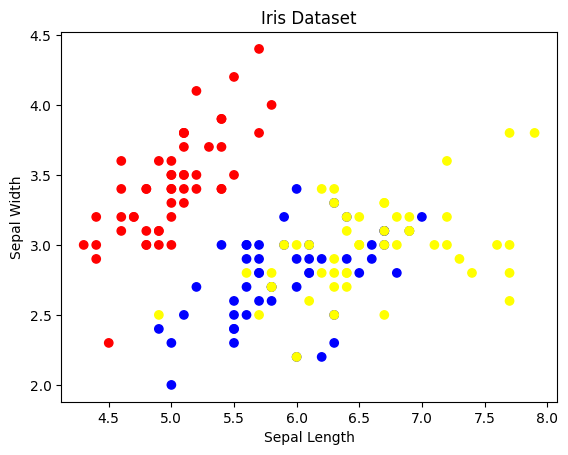

In [ ]:
# Plotting the data
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=colormap)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Dataset')
plt.show()